#### First create an empty dataframe with rows for each day, then fill it with the sales data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import add_delimiters

# Create a dataframe with rows for every day in the years 2020 to 2022, add additional date columns and 
df = pd.DataFrame(pd.date_range('2020-01-01', '2022-12-31', ), columns=['date'])
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df['week_of_year'] = df['date'].dt.isocalendar().week

#### Define the specific names of the relevant rows/columns/variables in the raw data

In [3]:
category_index = "Unnamed: 0"
sales_date_index = "Unnamed: 1"
total_count_index = "Unnamed: 2"
total_sales_index = "Unnamed: 3"

years = ["2021", "2022"]
months = ["01jan", "02feb", "03mar", "04apr", "05may", "06jun", "07jul", "08aug", "09sep", "10oct", "11nov", "12dec"]

main_categories = ['Getränke', 'Speisen', 'Sonstiges']
sub_categories = ['Milchmischgetränke', 'Speisen', 'Röstkaffee', 'Kaffee']
all_categories = np.concatenate((main_categories, sub_categories))
print("all_categories", all_categories)

# create new columns in the df for each category
for category in all_categories:
    df[f"{category}_sales"] = 0
    df[f"{category}_count"] = 0

all_categories ['Getränke' 'Speisen' 'Sonstiges' 'Milchmischgetränke' 'Speisen'
 'Röstkaffee' 'Kaffee']


#### Load the sales data for all years, write it to its corresponding date into the dataframe

In [5]:
for year in years:
    for month in months:
        data_dir = os.path.join('raw_data', year, month)
        data_names = os.listdir(data_dir)
        for day_file in data_names:
            data = pd.read_csv(add_delimiters(os.path.join(data_dir, day_file), delimiter=';'), sep=';', encoding="utf-8")
            data_date = data[sales_date_index][1]
            data_date = pd.to_datetime(data_date, format='%d.%m.%Y').strftime('%Y-%m-%d')
            # merge the main_categories and all_categories together
            for category in all_categories:
                try:
                    df.loc[df['date'] == data_date, f"{category}_sales"] = data[data[category_index] == category][total_sales_index].values[0]
                    df.loc[df['date'] == data_date, f"{category}_count"] = data[data[category_index] == category][total_count_index].values[0]
                except IndexError:
                    print(f"IndexError for {category} on {data_date}")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      1096 non-null   datetime64[ns]
 1   day_of_week               1096 non-null   object        
 2   month                     1096 non-null   object        
 3   year                      1096 non-null   int64         
 4   week_of_year              1096 non-null   UInt32        
 5   Getränke_sales            1096 non-null   object        
 6   Getränke_count            1096 non-null   object        
 7   Speisen_sales             1096 non-null   object        
 8   Speisen_count             1096 non-null   object        
 9   Sonstiges_sales           1096 non-null   object        
 10  Sonstiges_count           1096 non-null   object        
 11  Milchmischgetränke_sales  1096 non-null   object        
 12  Milchmischgetränke_c

In [6]:
# print the top k maximal values of Getränke_sales and the corresponding date
k = 15
# first convert the sales to float
df['Getränke_sales'] = df['Getränke_sales'].astype(float)
df['Getränke_count'] = df['Getränke_count'].astype(float)
print(df.nlargest(k, 'Getränke_sales')[['date', 'Getränke_sales']])
print(df.nlargest(k, 'Getränke_count')[['date', 'Getränke_count']])
             

           date  Getränke_sales
654  2021-10-16         3386.20
774  2022-02-13         2512.80
577  2021-07-31         2499.20
1025 2022-10-22         2310.60
738  2022-01-08         2227.00
936  2022-07-25         2112.30
953  2022-08-11         1994.70
712  2021-12-13         1980.60
1026 2022-10-23         1966.10
815  2022-03-26         1951.65
780  2022-02-19         1936.20
857  2022-05-07         1934.60
1046 2022-11-12         1906.20
1032 2022-10-29         1902.80
766  2022-02-05         1896.20
          date  Getränke_count
507 2021-05-22          1441.0
654 2021-10-16          1427.0
444 2021-03-20          1395.0
416 2021-02-20          1393.0
423 2021-02-27          1309.0
479 2021-04-24          1224.0
451 2021-03-27          1198.0
472 2021-04-17          1198.0
500 2021-05-15          1198.0
774 2022-02-13          1192.0
493 2021-05-08          1159.0
514 2021-05-29          1122.0
420 2021-02-24          1087.0
450 2021-03-26          1086.0
499 2021-05-14         

In [7]:
# Manually correct certain dates, where the sales data for two or more days is entered in one day

# 2021-10-16 has all data for 2021-10-16 and 2021-10-17,
print(df[654:655]["date"])
print(df[654:655]["Getränke_sales"])
combined_sales = df.loc[654, "Getränke_sales"]
getr_sales_on_2021_10_16 = 37.40 + 67.40 + 160.80 + 172.20 + 239.80 + 202.6 + 274.4 + 269.0 + 288.2 + 177.8 + 86.2
getr_sales_on_2021_10_17 = combined_sales - getr_sales_on_2021_10_16
df.loc[654, "Getränke_sales"] = getr_sales_on_2021_10_16
df.loc[655, "Getränke_sales"] = getr_sales_on_2021_10_17
print(df[654:656]["Getränke_sales"])
print("\n ---------------------------- \n")

# 2022-02-13 has all data for 2022-02-13 and 2022-02-14
print(df[774:775]["date"])
print(df[774:775]["Getränke_sales"])
combined_sales = df.loc[774, "Getränke_sales"]
getr_sales_on_2022_02_13 = combined_sales / 2  # TODO
getr_sales_on_2022_02_14 = combined_sales - getr_sales_on_2022_02_13
df.loc[774, "Getränke_sales"] = getr_sales_on_2022_02_13
df.loc[775, "Getränke_sales"] = getr_sales_on_2022_02_14
print(df[774:776]["Getränke_sales"])
print("\n ---------------------------- \n")

# 2021-07-31 has all data for 2021-07-31 and 2021-08-01
print(df[577:578]["date"])
print(df[577:578]["Getränke_sales"])
combined_sales = df.loc[577, "Getränke_sales"]
getr_sales_on_2021_07_31 = combined_sales / 2  # TODO
getr_sales_on_2021_08_01 = combined_sales - getr_sales_on_2021_07_31
df.loc[577, "Getränke_sales"] = getr_sales_on_2021_07_31
df.loc[578, "Getränke_sales"] = getr_sales_on_2021_08_01
print(df[577:579]["Getränke_sales"])
print("\n ---------------------------- \n")

# 2022-01-08 has all data for 2022-01-08 and 2022-01-09
print(df[738:739]["date"])
print(df[738:739]["Getränke_sales"])
combined_sales = df.loc[738, "Getränke_sales"]
getr_sales_on_2022_01_08 = combined_sales / 2  # TODO
getr_sales_on_2022_01_09 = combined_sales - getr_sales_on_2022_01_08
df.loc[738, "Getränke_sales"] = getr_sales_on_2022_01_08
df.loc[739, "Getränke_sales"] = getr_sales_on_2022_01_09
print(df[738:740]["Getränke_sales"])
print("\n ---------------------------- \n")

# 2022-07-25 has all data for 2022-07-25 and 2022-07-26
print(df[936:937]["date"])
print(df[936:937]["Getränke_sales"])
combined_sales = df.loc[936, "Getränke_sales"]
getr_sales_on_2022_07_25 = combined_sales / 2  # TODO
getr_sales_on_2022_07_26 = combined_sales - getr_sales_on_2022_07_25
df.loc[936, "Getränke_sales"] = getr_sales_on_2022_07_25
df.loc[937, "Getränke_sales"] = getr_sales_on_2022_07_26
print(df[936:938]["Getränke_sales"])
print("\n ---------------------------- \n")

# 2022-08-11 has all data for 2022-08-11 and 2022-08-12
print(df[953:954]["date"])
print(df[953:954]["Getränke_sales"])
combined_sales = df.loc[953, "Getränke_sales"]
getr_sales_on_2022_08_11 = combined_sales / 2  # TODO
getr_sales_on_2022_08_12 = combined_sales - getr_sales_on_2022_08_11
df.loc[953, "Getränke_sales"] = getr_sales_on_2022_08_11
df.loc[954, "Getränke_sales"] = getr_sales_on_2022_08_12
print(df[953:955]["Getränke_sales"])
print("\n ---------------------------- \n")

# 2021-12-13 has all data for 2021-12-13 and 2021-12-14 and 2021-12-15
print(df[712:714]["date"])
print(df[712:714]["Getränke_sales"])
combined_sales = df.loc[712, "Getränke_sales"]
getr_sales_on_2021_12_13 = combined_sales / 3  # TODO
getr_sales_on_2021_12_14 = combined_sales / 3  # TODO
getr_sales_on_2021_12_15 = combined_sales - getr_sales_on_2021_12_13 - getr_sales_on_2021_12_14
df.loc[712, "Getränke_sales"] = getr_sales_on_2021_12_13
df.loc[713, "Getränke_sales"] = getr_sales_on_2021_12_14
df.loc[714, "Getränke_sales"] = getr_sales_on_2021_12_15
print(df[712:715]["Getränke_sales"])
print("\n ---------------------------- \n")

654   2021-10-16
Name: date, dtype: datetime64[ns]
654    3386.2
Name: Getränke_sales, dtype: float64
654    1975.8
655    1410.4
Name: Getränke_sales, dtype: float64

 ---------------------------- 

774   2022-02-13
Name: date, dtype: datetime64[ns]
774    2512.8
Name: Getränke_sales, dtype: float64
774    1256.4
775    1256.4
Name: Getränke_sales, dtype: float64

 ---------------------------- 

577   2021-07-31
Name: date, dtype: datetime64[ns]
577    2499.2
Name: Getränke_sales, dtype: float64
577    1249.6
578    1249.6
Name: Getränke_sales, dtype: float64

 ---------------------------- 

738   2022-01-08
Name: date, dtype: datetime64[ns]
738    2227.0
Name: Getränke_sales, dtype: float64
738    1113.5
739    1113.5
Name: Getränke_sales, dtype: float64

 ---------------------------- 

936   2022-07-25
Name: date, dtype: datetime64[ns]
936    2112.3
Name: Getränke_sales, dtype: float64
936    1056.15
937    1056.15
Name: Getränke_sales, dtype: float64

 ---------------------------- 

In [9]:
# drop all rows where no sales were made/are not available
df = df[df["Getränke_sales"] != 0]
# save the df as a csv file
df.to_csv('processed_data/sales_2021-2022.csv', index=False)

# play around with some plots

c:\Users\Magnus Kaut\.conda\envs\PytorchGeometric\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


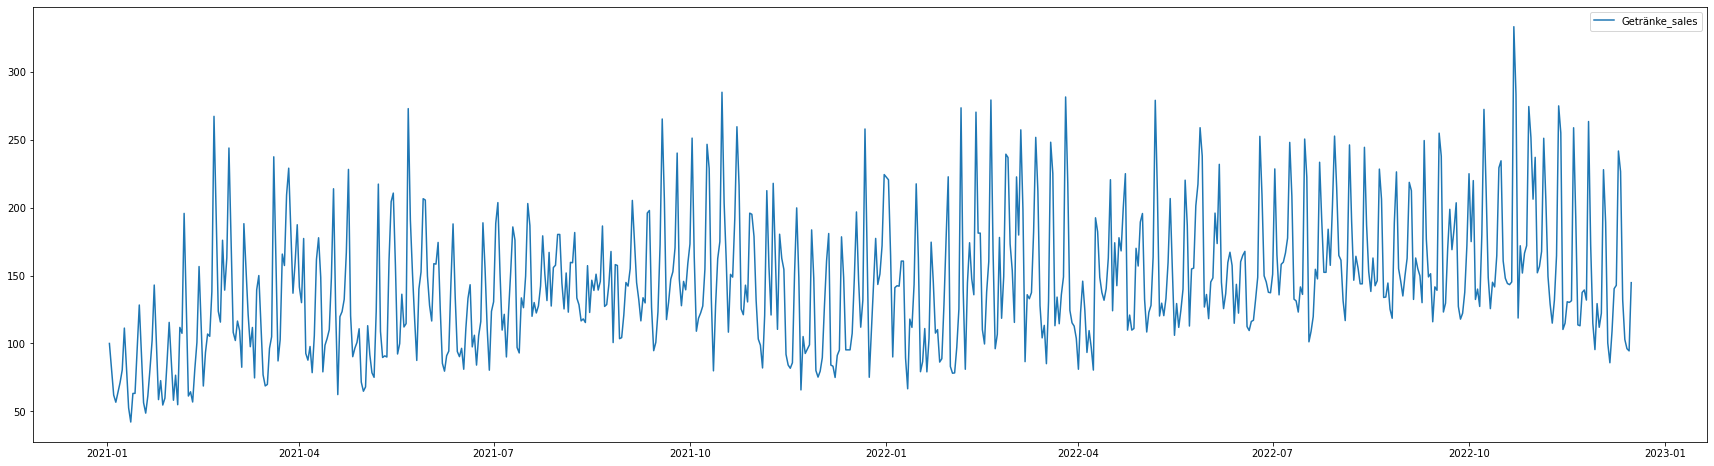

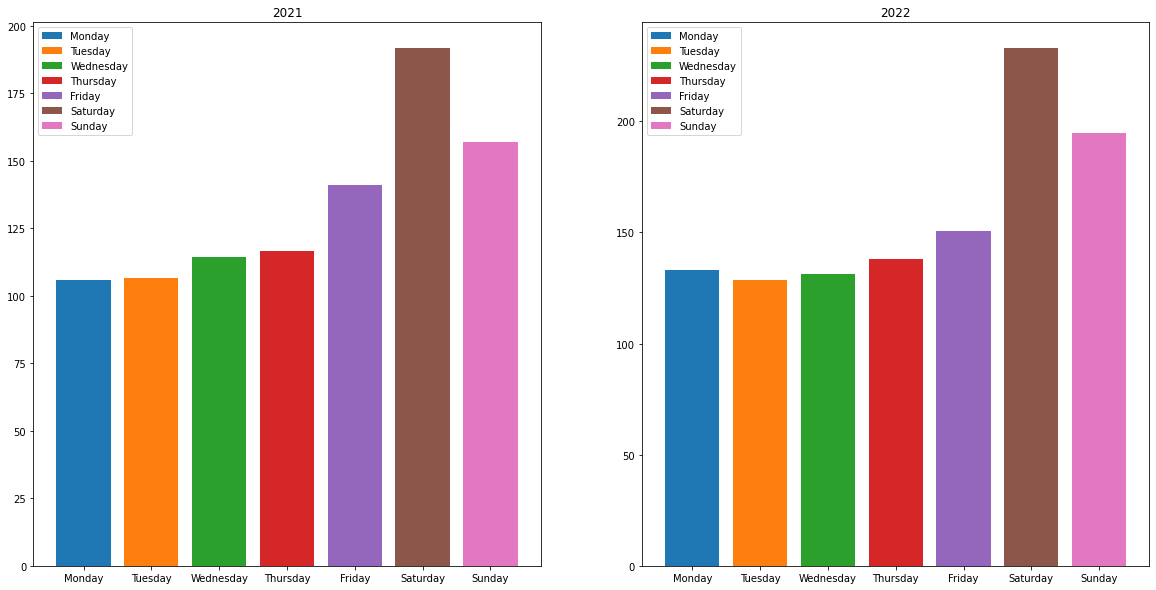

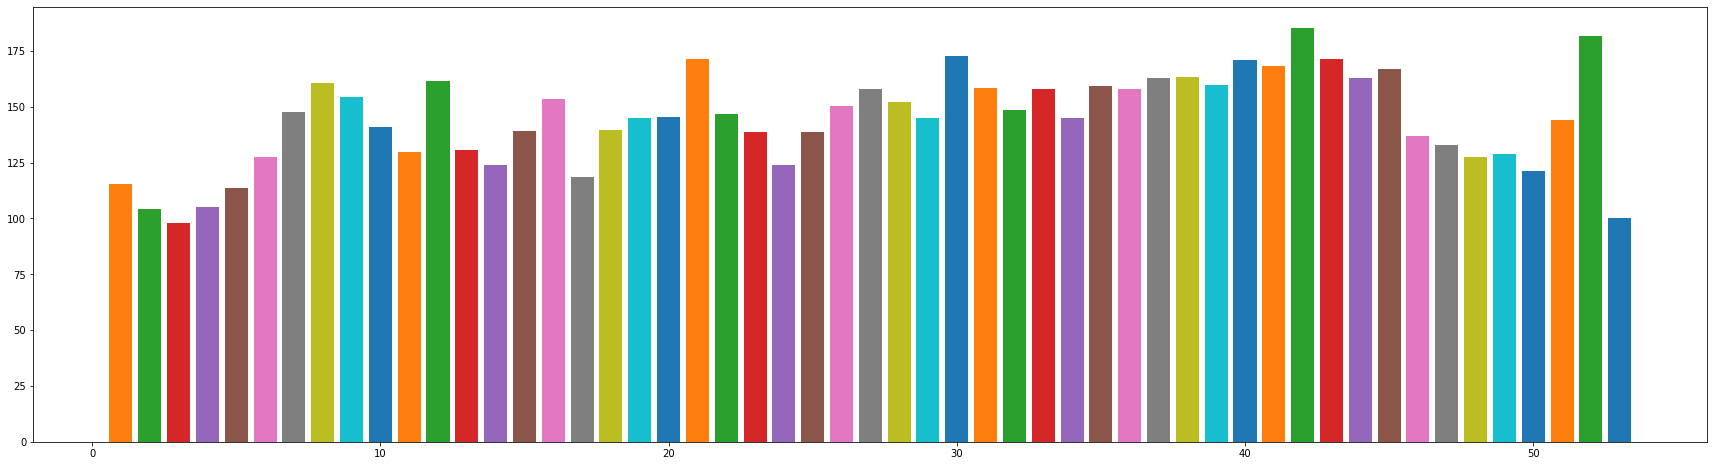

In [16]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(30, 8))
ax.plot(df["date"].astype("datetime64"), df["Getränke_sales"].astype("float"))
# add a vline where the day of the week is Saturday
#x.vlines(df[df["day_of_week"] == "Saturday"]["date"].astype("datetime64"), 0, 3000, colors='r', linestyles='dashed')
# add a legend
ax.legend(["Getränke_sales"])

# plot an histogram where on the x axis are the seven days of the week and on the y axis the sales, avereaged over all months, in two subplots for each year
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

for year in df["year"].unique():
    for day in days:
        ax[int(year) - 2021].bar(day, df[(df["day_of_week"] == day) & (df["year"] == year)]["Getränke_sales"].astype("float").mean(), label=day)
        ax[int(year) - 2021].set_title(year)
        ax[int(year) - 2021].legend()

# plot the mean sales of each week in the year
fig, ax = plt.subplots(figsize=(30, 8))
for week in df["week_of_year"].unique():
    ax.bar(week, df[df["week_of_year"] == week]["Getränke_sales"].astype("float").mean(), label=week)



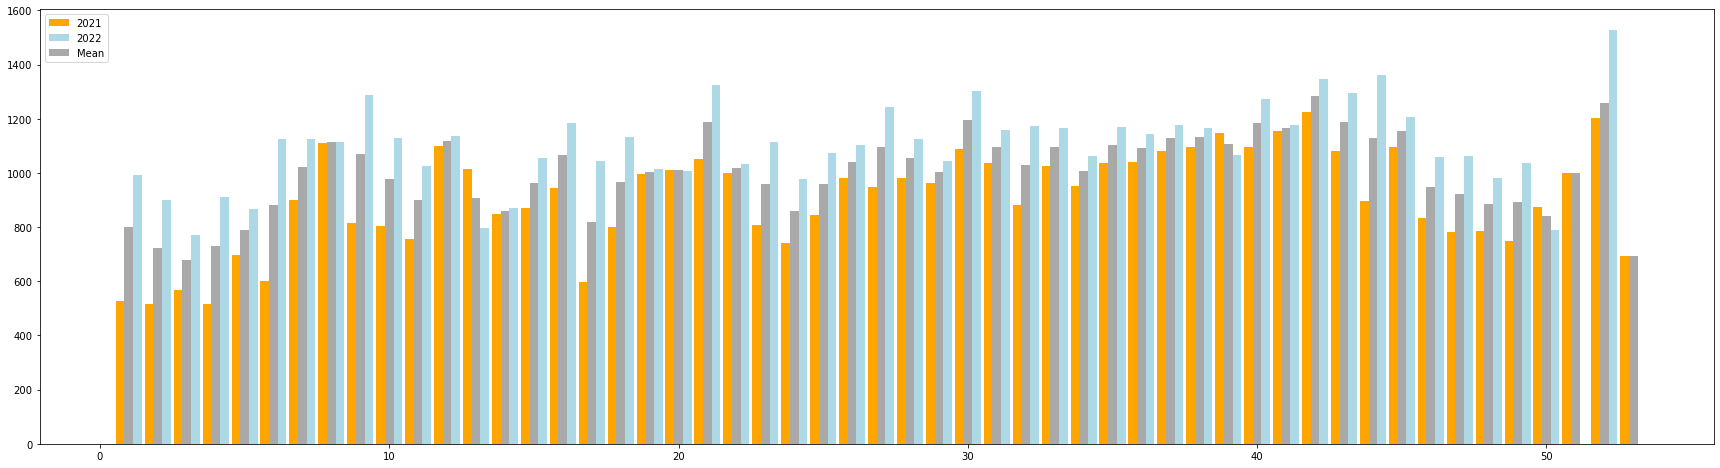

In [11]:
# plot a bar graph where on the x axis are the weeks of the year and on the y axis the sales, each bar is split for 2021 and 2022
fig, ax = plt.subplots(figsize=(30, 8))

width = 0.3
for week in df["week_of_year"].unique():
    ax.bar(week - width, df[(df["week_of_year"] == week) & (df["year"] == 2021)]["Getränke_sales"].astype("float").mean(), width, color="orange")
    ax.bar(week + width, df[(df["week_of_year"] == week) & (df["year"] == 2022)]["Getränke_sales"].astype("float").mean(), width, color="lightblue")
    ax.bar(week, df[df["week_of_year"] == week]["Getränke_sales"].astype("float").mean(), width, color="darkgrey")
ax.legend(["2021", "2022", "Mean"])

plt.show()



Text(0.5, 1.0, 'Fridays sales')

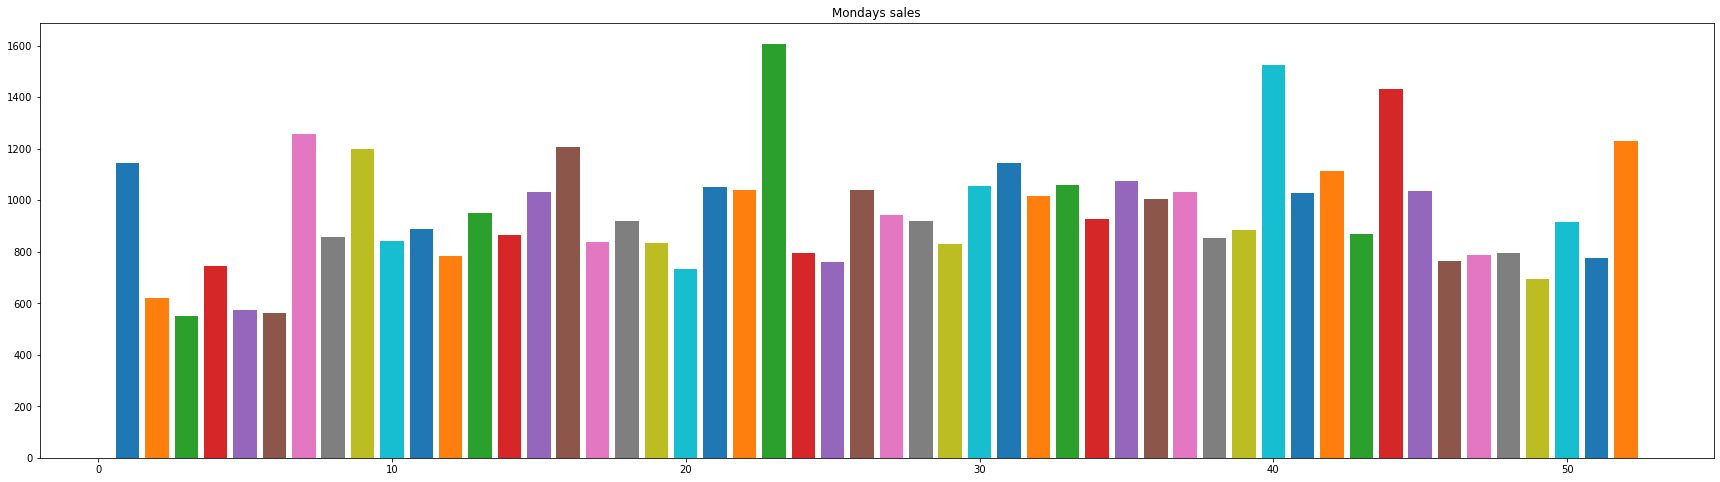

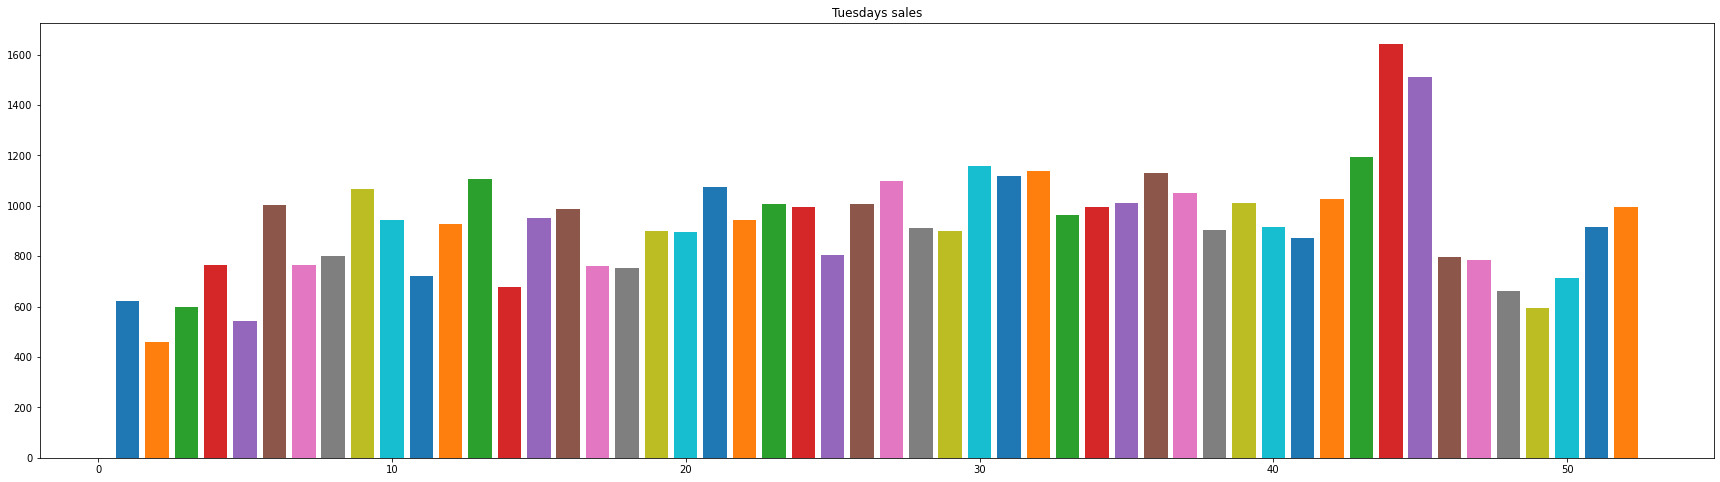

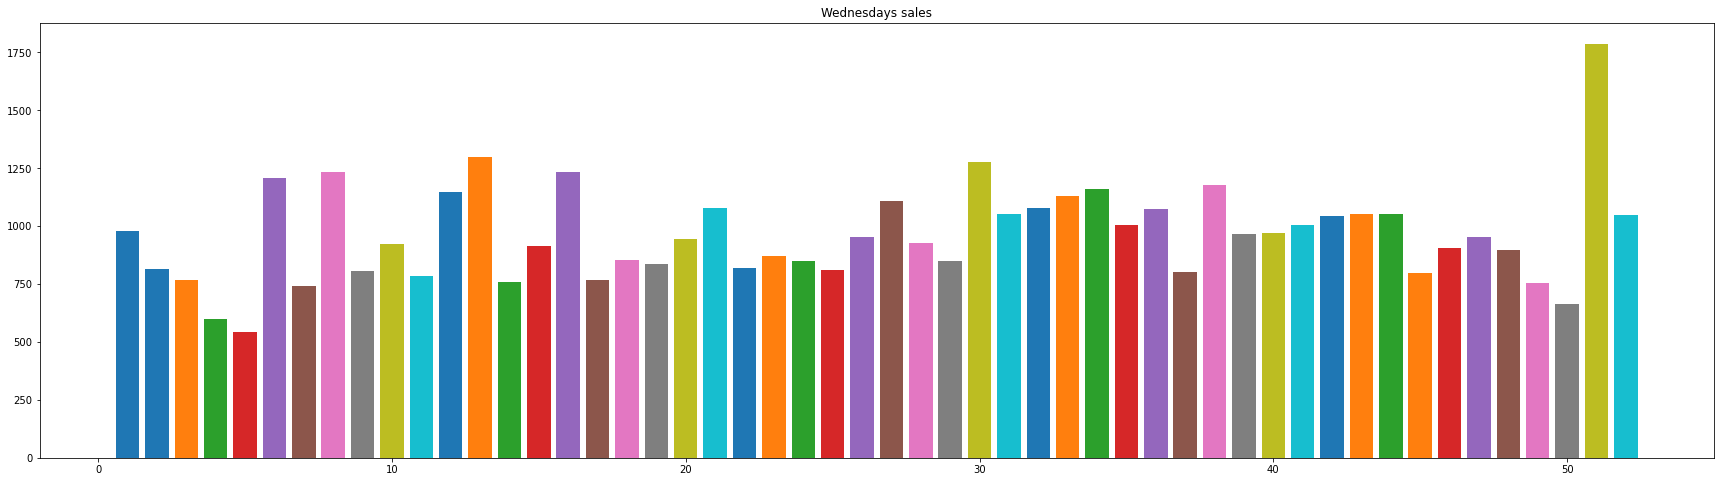

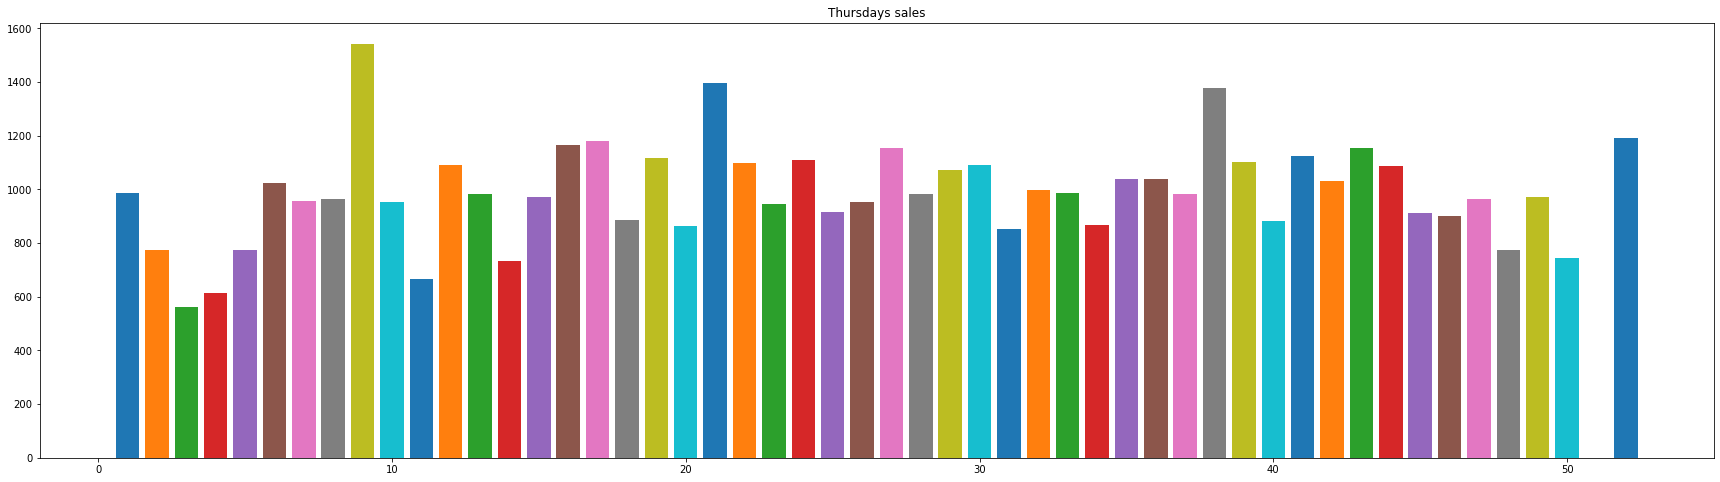

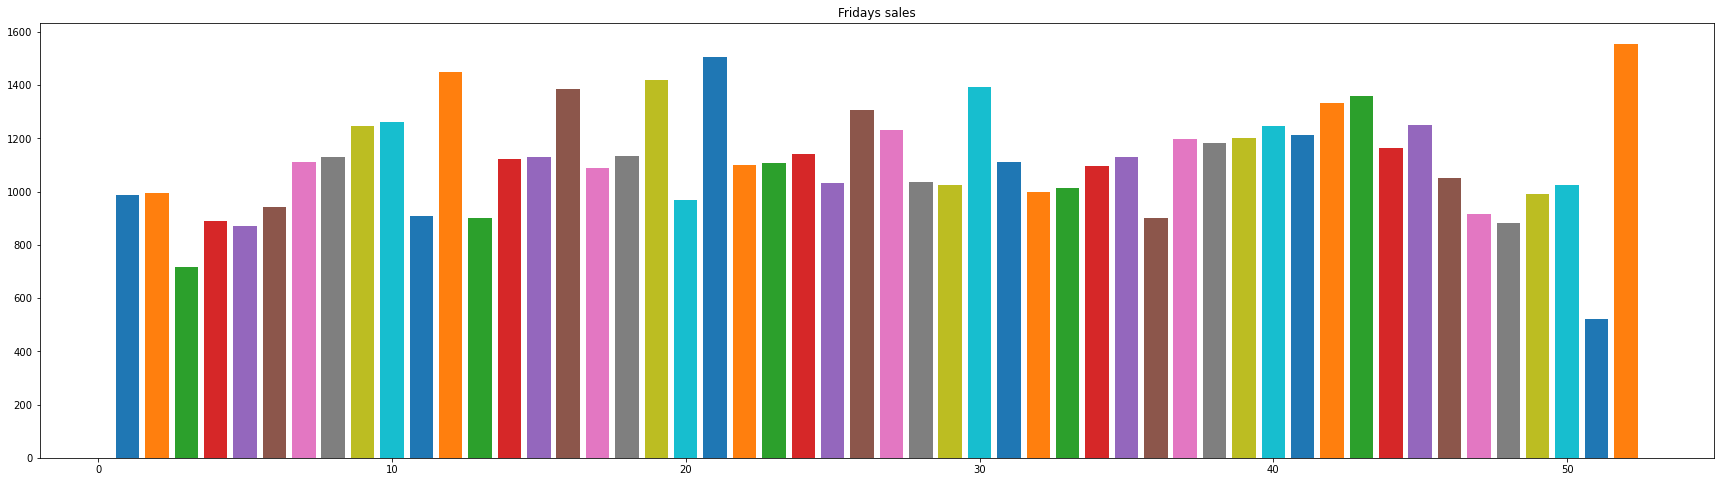

In [12]:
# plot the sales for each monday in the year
fig, ax = plt.subplots(figsize=(30, 8))
for week in df[df["day_of_week"] == "Monday"]["week_of_year"].unique():
    ax.bar(week, df[(df["week_of_year"] == week) & (df["day_of_week"] == "Monday")]["Getränke_sales"].astype("float"), label=week)
plt.title("Mondays sales")

# plot the sales for each tuesday in the year
fig, ax = plt.subplots(figsize=(30, 8))
for week in df[df["day_of_week"] == "Tuesday"]["week_of_year"].unique():
    ax.bar(week, df[(df["week_of_year"] == week) & (df["day_of_week"] == "Tuesday")]["Getränke_sales"].astype("float"), label=week)
plt.title("Tuesdays sales")

# plot the sales for each wednesday in the year
fig, ax = plt.subplots(figsize=(30, 8))
for week in df[df["day_of_week"] == "Wednesday"]["week_of_year"].unique():
    ax.bar(week, df[(df["week_of_year"] == week) & (df["day_of_week"] == "Wednesday")]["Getränke_sales"].astype("float"), label=week)
plt.title("Wednesdays sales")

# plot the sales for each thursday in the year
fig, ax = plt.subplots(figsize=(30, 8))
for week in df[df["day_of_week"] == "Thursday"]["week_of_year"].unique():
    ax.bar(week, df[(df["week_of_year"] == week) & (df["day_of_week"] == "Thursday")]["Getränke_sales"].astype("float"), label=week)
plt.title("Thursdays sales")

# plot the sales for each friday in the year
fig, ax = plt.subplots(figsize=(30, 8))
for week in df[df["day_of_week"] == "Friday"]["week_of_year"].unique():
    ax.bar(week, df[(df["week_of_year"] == week) & (df["day_of_week"] == "Friday")]["Getränke_sales"].astype("float"), label=week)
plt.title("Fridays sales")